<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [15]:
energy=pd.read_csv('global-data-on-sustainable-energy.csv')

### <span style="color:blue">**I. Prétraitement des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

#### En utilisant l'analyse statistique "count", nous remarquons des variations dans le nombre d'observations pour chaque variable, ce qui suggère la présence de données manquantes.

In [16]:
(energy.isna().sum()/energy.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

##### Nous allons procéder à l'élimination des variables "Renewables", "Financial flows to developing countries" et "Renewable-electricity-generating-capacity-per-capita" en raison de leur taux élevé de données manquantes, situé entre 25 % et 60 %. Ensuite, nous filtrerons tous les individus présentant des valeurs non disponibles (NaN) pour les variables restantes. Cette étape nous permettra de conserver 2868 individus avec 18 variables.

In [17]:
energy.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [18]:
energy.dropna(axis=0,inplace=True)
energy.shape

(2868, 18)

In [19]:
energy.iloc[:,14]=energy.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')

/tmp/ipykernel_14785/2884096525.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')


#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [20]:
energy['Year'] = energy['Year'].astype('category')
energy.rename(columns={energy.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
energy['Density']= pd.to_numeric(energy['Density'], errors='coerce')


In [21]:
# Regrouper les émissions de CO2 par pays
co2_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


##### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allmagne

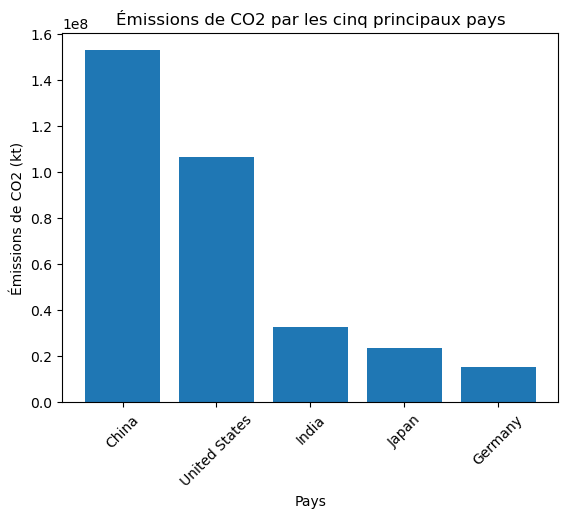

In [22]:
# Sélectionner les cinq principaux pays
top_5_countries = co2_by_country_sorted.head(5)

# Tracer l'histogramme
plt.bar(top_5_countries['Entity'], top_5_countries['Value_co2_emissions_kt_by_country'])
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.title('Émissions de CO2 par les cinq principaux pays')
plt.xticks(rotation=45)
plt.show()

#### On supprime également la variable Electricity from fossil fuels (TWh). Cette variable étant très corrélée avec la variable à prédire ,  on l'enlève d'après la consigne.

In [23]:
energy.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

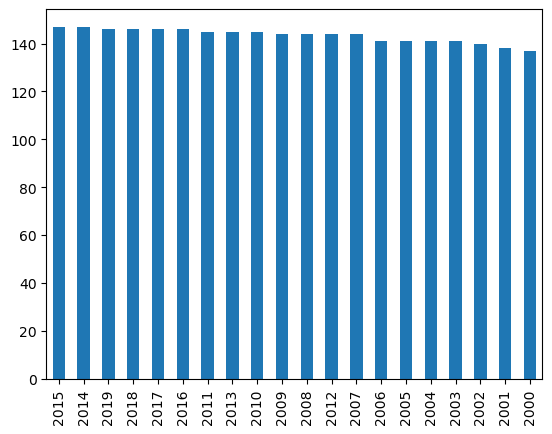

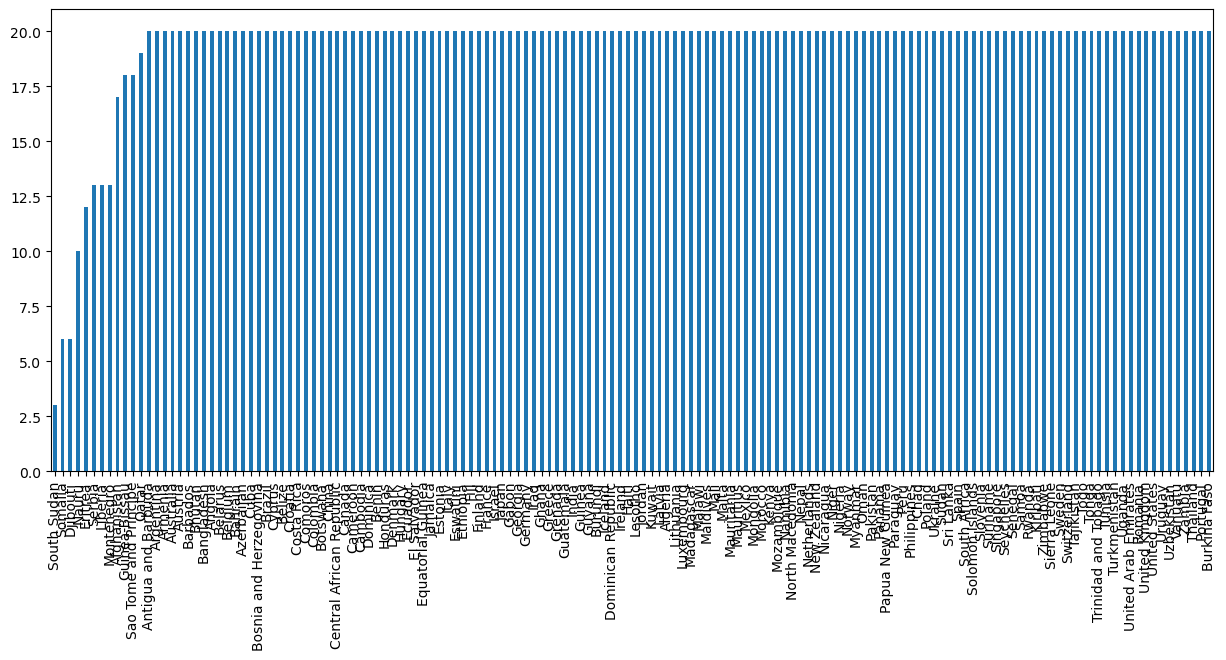

In [24]:
energy['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

energy['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

#### Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres.

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [25]:
energyQuant=energy.iloc[:,2:] #On extrait que les variables quantitatives

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'Value_co2_emissions_kt_by_country'),
  Text(9, 0, 'gdp_growth'),
  Text(10, 0, 'gdp_per_capita'),
  Text(11, 0, 'Density'),
  Text(12, 0, 'Land Area(Km2)'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude')])

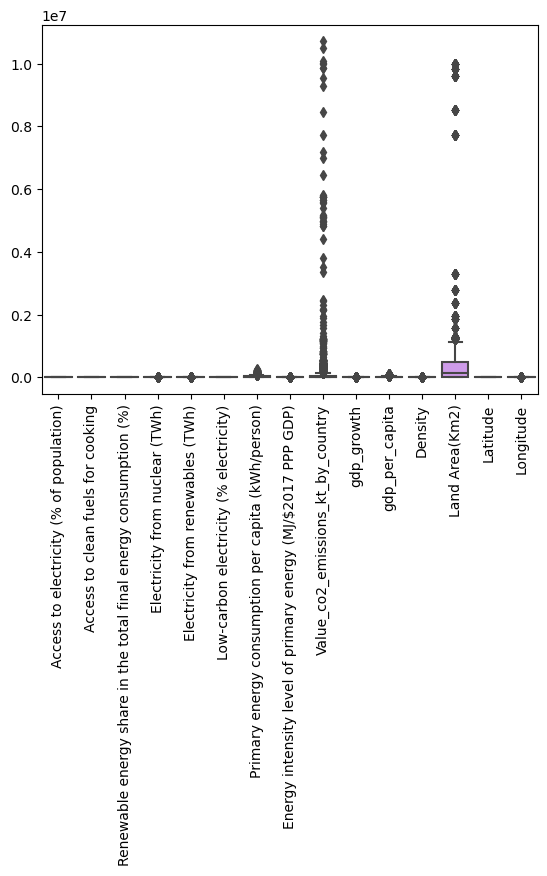

In [26]:
sns.boxplot(energyQuant)
plt.xticks(rotation=90)

#### Nous notons que nos variables présentent non seulement des unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire

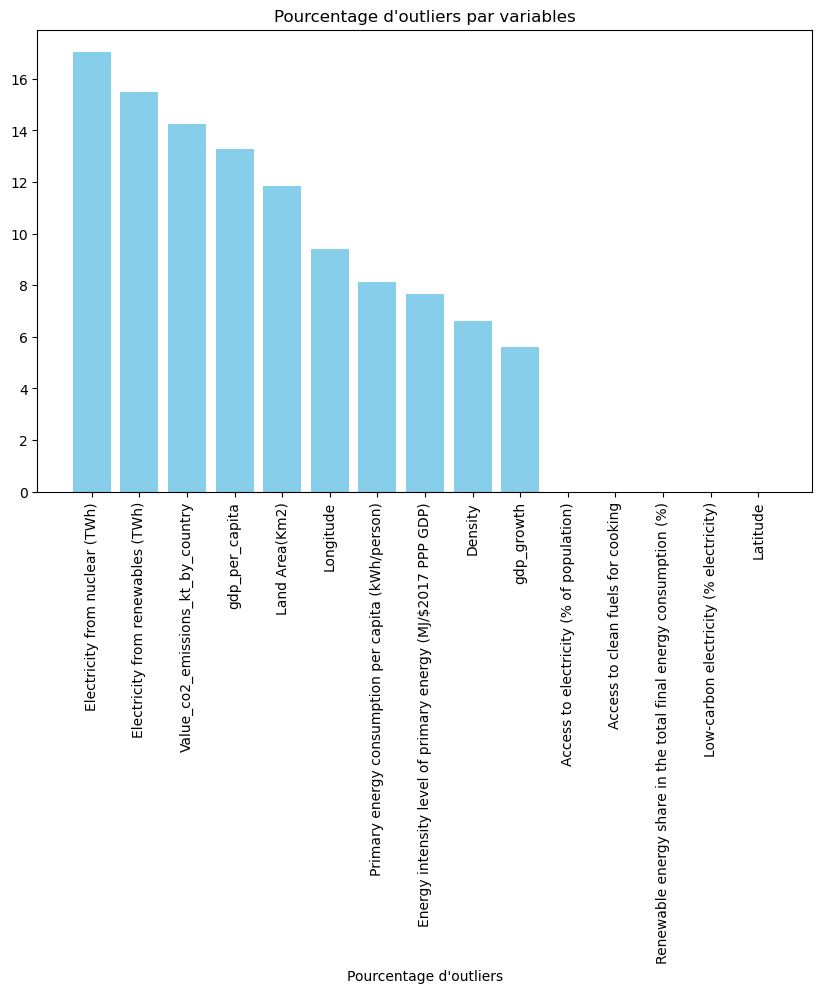

In [27]:

def percent_outliers(data): #renvoie
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(energyQuant)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






#### On remarque après analyse des boxplot qu’il y'a beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays par rapport aux autres, ces sources d'énergie soient très abondantes et largement utilisées, ce qui peut entraîner des fluctuations  dans les données.

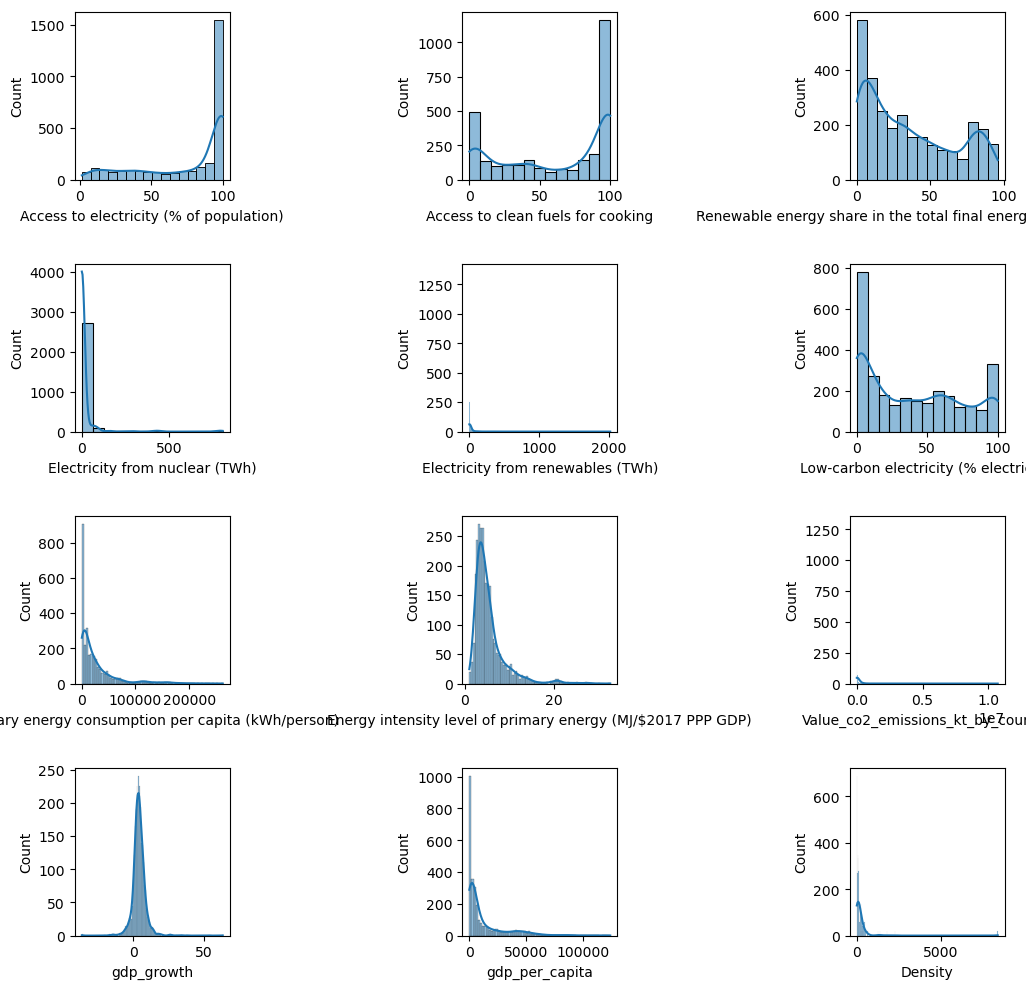

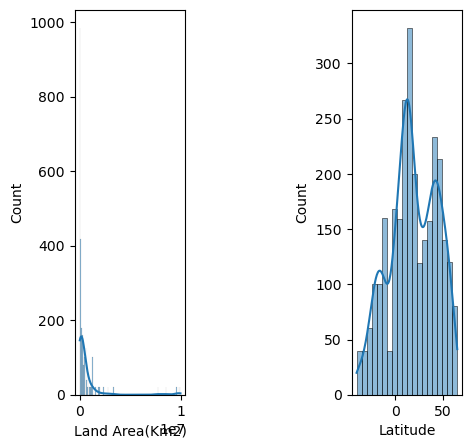

In [28]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

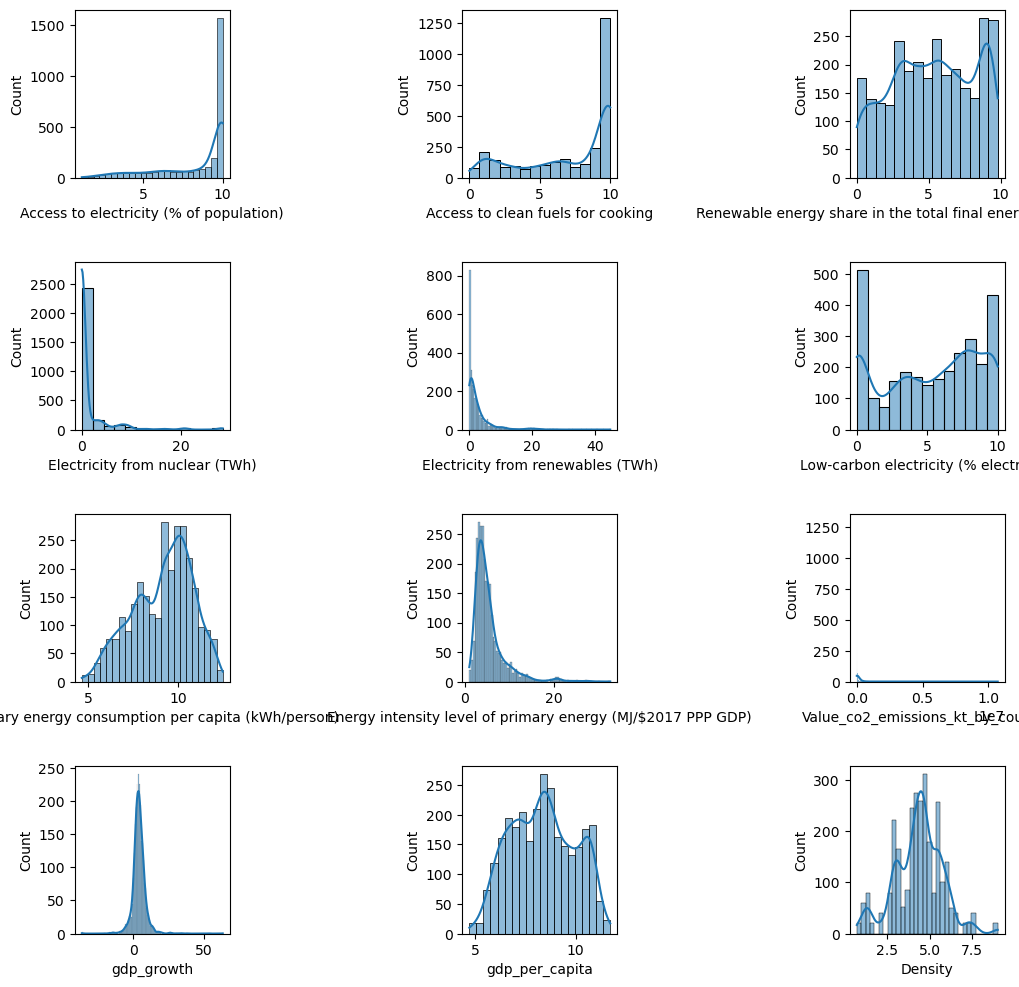

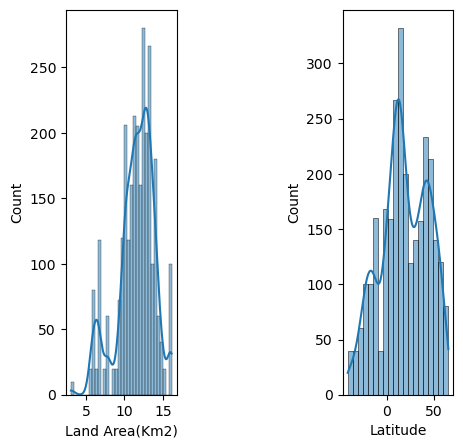

In [29]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy[columns_sqrt] = np.sqrt(energy[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
energy[columns_log] = np.log(energy[columns_log])

energyQuant=energy.iloc[:,2:]

fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

#### On transforme les données en leur appliquant des fonctions logarithme ou racine carrée selon leur forme afin de leur donner une forme plus gaussienne.

### <span style="color:blue">**II. Analyse multidimentionnelle** </span>

<Axes: >

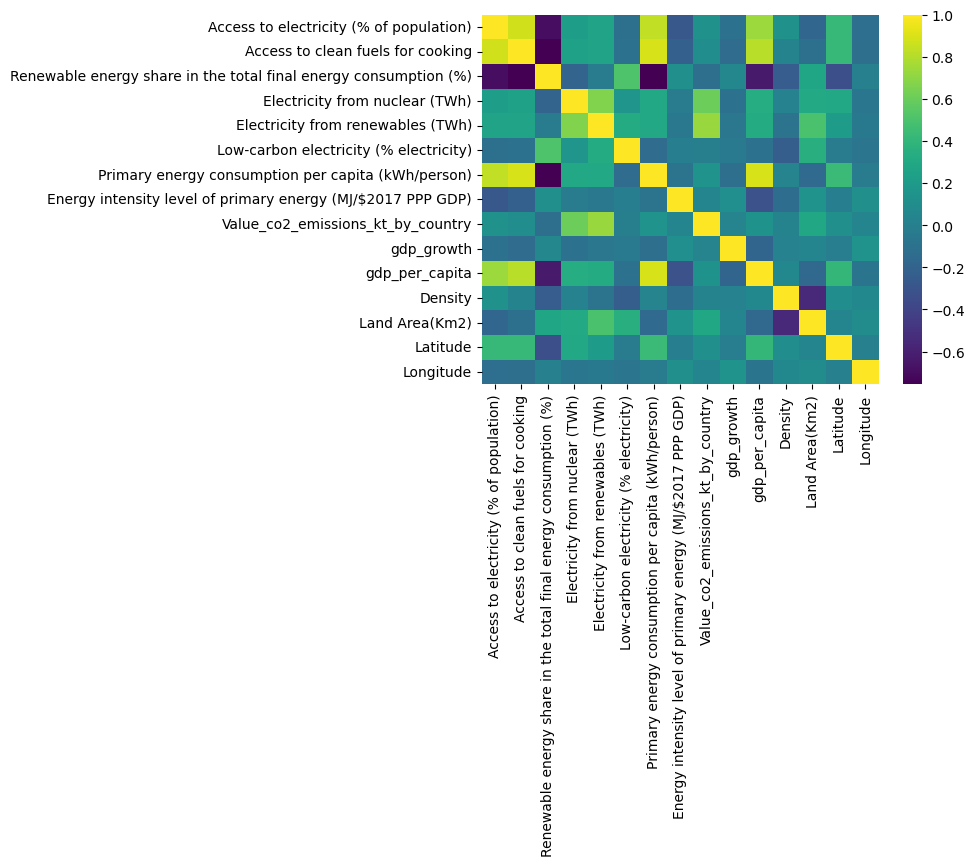

In [30]:
correlationsns.heatmap(energyQuant.corr(), cmap='viridis')


#### Selon le graphique de corrélation (heatmap), on observe que la variable à prédire, la quantité d'émissions de CO2 par pays (Value_co2_emissions_kt_by_country), présente une corrélation plus significative avec la production d'électricité à partir de sources renouvelables, et dans une moindre mesure avec la production d'électricité d'origine nucléaire. Cependant, elle affiche une corrélation négative avec la proportion d'énergie renouvelable dans la consommation totale d'électricité.
#### La corrélation observée peut sembler contre-intuitive. Cependant, elle peut être expliquée par le fait que les pays plus riches ont souvent une capacité plus importante à investir dans le nucléaire et les énergies renouvelables. Ainsi, une plus grande production d'électricité à partir de ces sources pourrait être associée à des niveaux d'émissions de CO2 plus élevés, car des niveaux de richesse plus importante.
#### Par ailleurs, la corrélation négative entre les émissions de CO2 et la part d'énergie renouvelable dans la consommation d'électricité souligne l'importance des énergies propres pour réduire ces émissions.

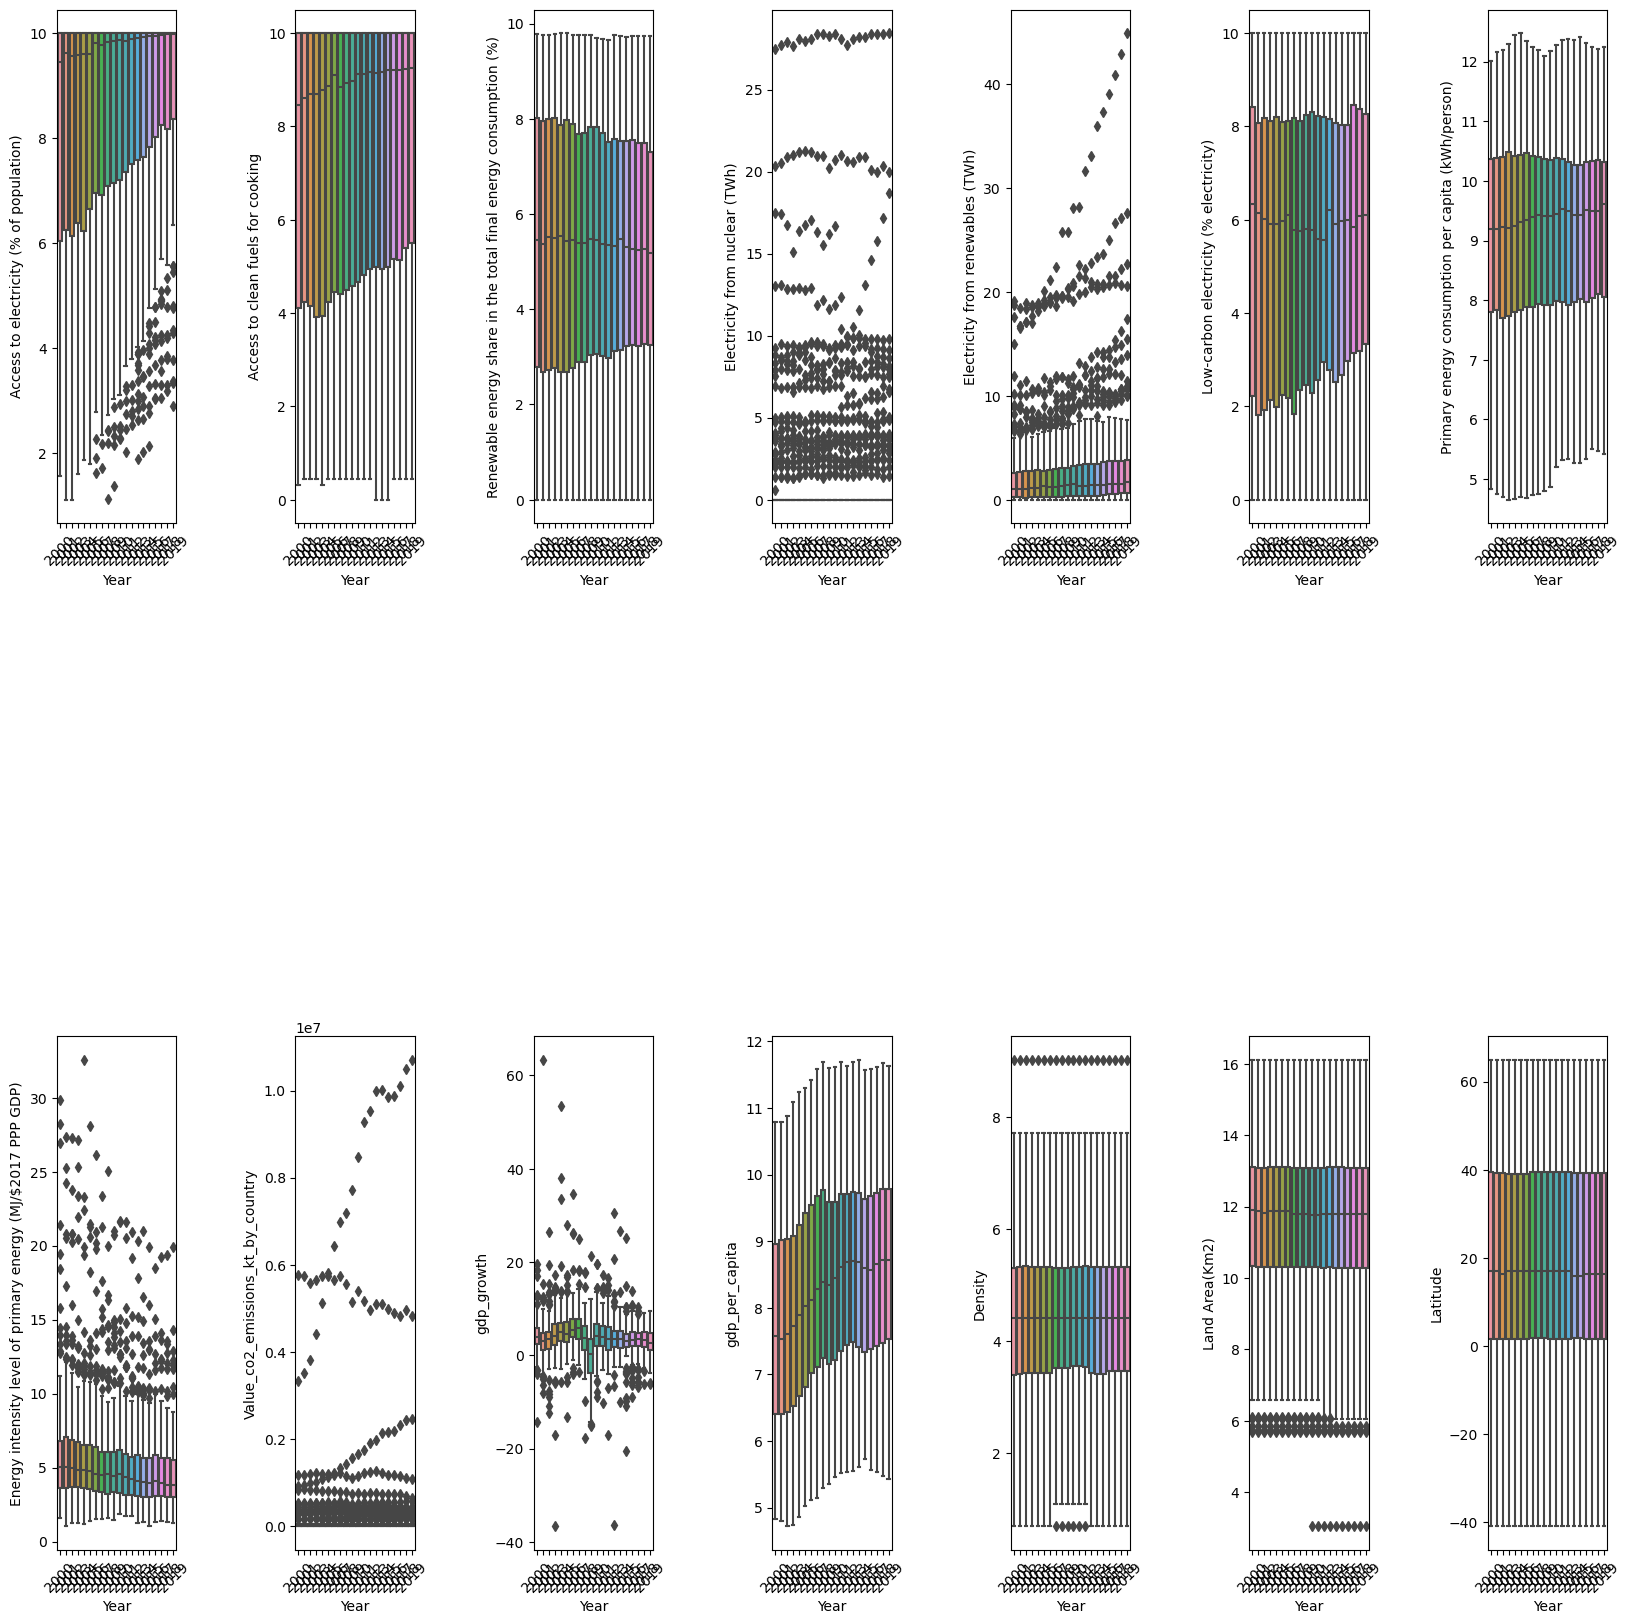

In [34]:
fig,ax=plt.subplots(2,7,figsize=(20,20))
plt.subplots_adjust(hspace=1, wspace=1)
k=0
for i in range(2):
    for j in range(7):
        sns.boxplot(x=energy.iloc[:,1],y=energyQuant.iloc[:,k],data=energy,ax=ax[i, j])
        ax[i, j].set_xticks(ax[i, j].get_xticks())
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
        k+=1
plt.show()

#### <span style="color:blue">b. Analyse en composantes principales</span>

#### Avant de faire l'acp , on retire la variable à prédire.

In [35]:
Value_co2_emissions_kt_by_country=np.log(energy['Value_co2_emissions_kt_by_country'])
energy.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
energyQuant.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(energyQuant)
energyQuant1=scaler.transform(energyQuant)
pca=PCA()
energyQuant1_pca=pca.fit(energyQuant1).transform(energyQuant1)


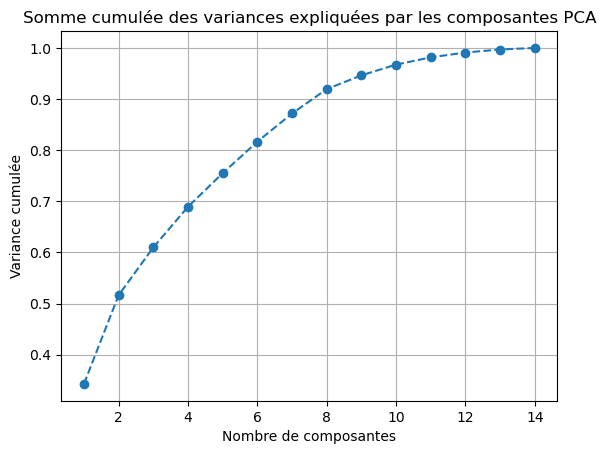

In [37]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,15),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

#### On constate que pour expliquer 80% de la variance il faut choisir 6 dimensions.

In [38]:
import country_converter as coco
Continents= coco.convert(names=energy['Entity'], to='continent')
type(Continents)


list

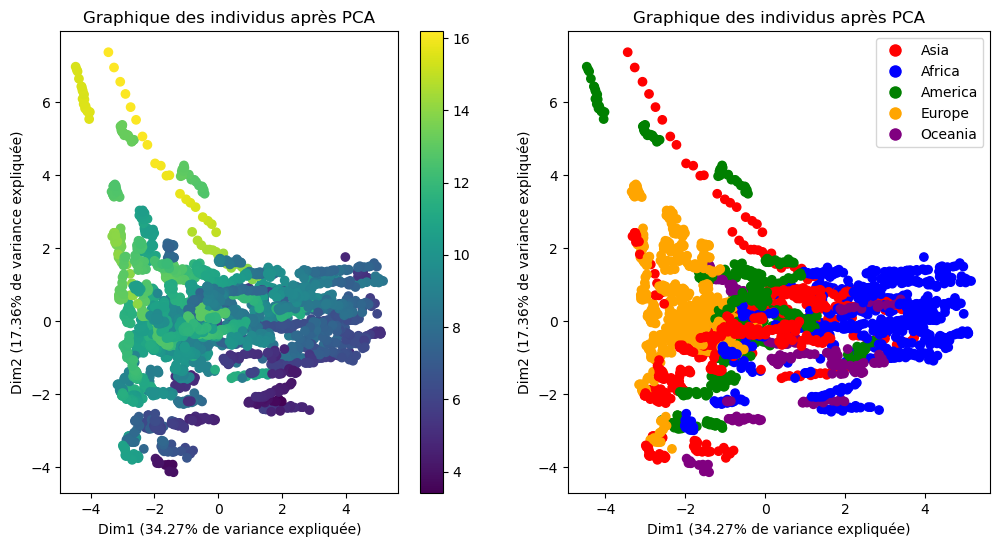

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(energyQuant1_pca[:,0],energyQuant1_pca[:,1], c=Value_co2_emissions_kt_by_country)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA')
plt.colorbar()
continent_colors = {
    'Asia': 'red',
    'Africa': 'blue',
    'America': 'green',
    'Europe': 'orange',
    'Oceania': 'purple'
}

# Création du graphique
plt.subplot(122)
plt.scatter(energyQuant1_pca[:, 0], energyQuant1_pca[:, 1], c=[continent_colors[continent] for continent in Continents], label='Continents')
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA')
plt.legend(np.unique(Continents))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                             markerfacecolor=color, markersize=10) 
                  for continent, color in continent_colors.items()]
plt.legend(handles=legend_handles)

plt.show()


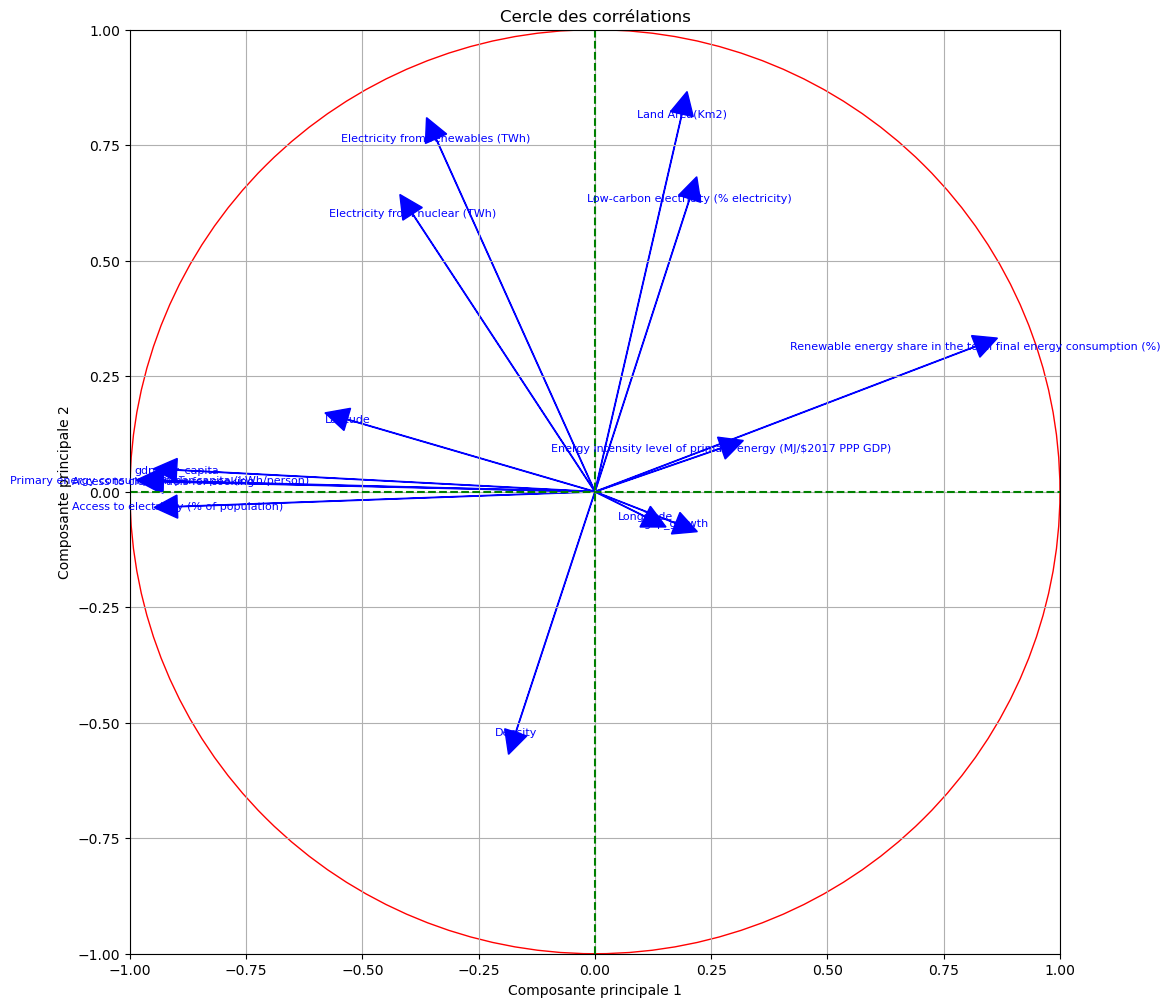

In [45]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(12, 12))
for i, j, nom in zip(coord1, coord2, energyQuant.columns):
    ax.text(i, j, nom, fontsize=8, ha='center', va='center', color='blue')
    ax.arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)

ax.set(xlim=(-1, 1), ylim=(-1, 1))
ax.axhline(0, linestyle='dashed', color='green')
ax.axvline(0, linestyle='dashed', color='green')

# Ajout du cercle
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
ax.add_patch(cercle)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle des corrélations')

plt.grid(True)
plt.show()


#### On trace le graphe des individus colorié en fonction du taux d'émission de C02 , puis par le continent auquel les individus (pays) appartiennent. On remarque toute suite que les pays les plus pollueurs sont plus fortement corrélées avec la dimension 2 et aussi plus fortement corrélées négativement avec la dimension 1. Le taux d'émission de c02 est corrélé négativement avec la dimension 1 et positivement  avec la dimension 2.

#### De plus dans le graphe des individus, nous constatons que les pays les plus Européens se  situent pour la majorité , négativement par rapport à la dimension 1 alors que les pays africain sont positivement corrélés.Pour les pays asiatiques et américains on retrouve les Etas-Unis , la Chine et le Japon aux extrémités du côté négatif  (car on sait que ce sont les pays les plus pollueurs, donc se situent aux extrèmes), mais la plupart des autres pays des continents américain et asiatique se situent du côté positif. On avait déja intuité le fait que la pollution est liée à la riichesse avec la matrice de corrélation et on retrouve les même effet. Le PIB par habitant est  d'ailleurs fortement corrélé négativement à la dimension 1. La dimension 1 est fortement liée à la richesse du pays

#### Pour la dimension 2, on voit qu'elle est corrélée positivement la taille du pays (Land Area), la quantité d'électricité renouvelables, d'électricité nucléaire et de d'électricité bas carbone. Avec le graphe des individus , nous constatons que la quantité de CO2 emise est positivement corrélée à la dimension 2. La dimension 2 est donc liée à l'accès à l'électricité.

### <span style="color:blue">**III. Modélisations** </span>

In [41]:
energy.reset_index(drop=True,inplace=True)
energyQuant.reset_index(drop=True,inplace=True)

In [42]:
dataDum=pd.get_dummies(energy[['Year','Entity']]) #Transformation des variables qualitatives en indicatrice

energyC= pd.concat([dataDum, energyQuant], axis=1) 
energyC.head()

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,0,0,0,1,0,0,0,0,0,0,...,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
1,0,0,0,0,1,0,0,0,0,0,...,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953
2,0,0,0,0,0,1,0,0,0,0,...,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953
3,0,0,0,0,0,0,1,0,0,0,...,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953
4,0,0,0,0,0,0,0,1,0,0,...,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A Régression linéaire sans sélection de variables** </span>

In [46]:
print(energyC.shape)  #n>p

(2868, 182)


La régression linéaire va modéliser les données de la manière suivante:

On a une variable explicative Value_co2_emissions_kt_by_country qu'on va appeler $Y$ à prédire avec 25 variables explicatives.$X_i$


$$
Y = \beta_0 + \sum_{i=1}^{25} \beta_i X_i + \epsilon_i
$$

Où :

$$\beta_0$$ est l'ordonnée à l'origine,
$$\beta_i$$ sont les coefficients de régression pour les variables explicatives,
$$X_i$$ étant les variables explicatives
$$\epsilon_i$$ étant les résidus.



On a n=nombre de lignes (2868) > p=nombre de colonnes (25)

L'objectif est d'estimer les paramètres $\beta_i$ 

#### Les variables Entiy et Year possédant trop de modalités on va passer à un modèle simplifié ou les pays sont regroupés par continent et les années par période quadriennale pour faciliter la modélisation linéaire et son interprètation.

In [ ]:
energy2=energy.copy()
energy2['Year']=energy2['Year'].astype(int)


energy2['Periode']=(energy2['Year']//4)*4

#Rennommer les années en période:
energy2['Periode'] =energy2['Periode'].astype('category')

energy2.drop(columns=['Year'],inplace=True)

energy2['Continent']= coco.convert(names=data2['Entity'], to='continent')
energy2.drop(columns=['Entity'],inplace=True)

energy2.head()




In [ ]:

dataDum=pd.get_dummies(energy2[['Periode','Continent']])



energyC= pd.concat([dataDum, energyQuant], axis=1) 
energyC.head()





In [ ]:

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(energyC, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=111)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

In [ ]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)



# Making predictions on the testing set
y_chap_RL = regLin.predict(Xr_test)

# Calculating mean squared error
RL_mse = mean_squared_error(YTest, y_chap_RL)
RL_R2=r2_score(YTest,y_chap_RL)
print("MSE =", RL_mse)
print("R2 =",RL_R2)

In [ ]:
import scipy.stats as stats
import pylab 


In [ ]:
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(YTest-y_chap_RLb,kde=True)
plt.ylabel('Count')
plt.xlabel('residuals')

plt.subplot(1,3,2)
plt.scatter(y_chap_RLb,YTest-y_chap_RLb)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.subplot(1,3,3)
stats.probplot(YTest-y_chap_RLb, dist="norm", plot=pylab)
pylab.show()
plt.show()

#### <span style="color:blue">**III.A.3 Regression linéaire Lasso** </span>

In [ ]:
from sklearn.linear_model import Lasso
# Fitting the Lasso regression model
start_time = time.time()
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap_lasso = regLasso.predict(Xr_test)

# Calculating mean squared error
lasso_mse = mean_squared_error(YTest, y_chap_lasso)
lasso_R2=r2_score(YTest,y_chap_lasso)
end_time = time.time()
Time=end_time-start_time
Mse_M["RegLinLasso"]=lasso_mse
Time_M["RegLinLasso"]=Time
print("MSE =", lasso_mse)
print("R2 = ",lasso_R2)
print("Time= ",Time)

In [ ]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
plt.scatter(y_chap_lasso,YTest-y_chap_lasso)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [ ]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
y_chap_lassOpt=regLassOpt.predict(Xr_test)
lassOpt_mse=mean_squared_error(y_chap_lassOpt,YTest)
lassOpt_R2=r2_score(YTest,y_chap_lassOpt)
print("MSE=",lassOpt_mse)
print("R2=",lassOpt_R2)
#Le modèle est sur paramétré avec 20

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(y_chap_lassOpt,YTest,"o")
plt.xlabel("Fitted values")
plt.ylabel("values")

plt.subplot(1,2,2)
plt.plot(y_chap_lassOpt,YTest-y_chap_lassOpt,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.show()



In [ ]:
coef = pd.Series(regLassOpt.best_estimator_.coef_, index = XTrain.columns)
print("LassoOPT conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

### <span style="color:blue"> **III.B SVM**  </span>

In [ ]:
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(energyQuant, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)



In [ ]:
 from sklearn.svm import SVR

param = {'coef0': [2, 3, 4,5,6,7,12,15]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm,YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:
from sklearn.svm import SVR

param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1,coef0=2, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:

#param= {'C': [0,5,10,15,100,200],}
param = {"C":[0.4,0.5,0.6,0.8,1,1.4,10,15]} 
svm= GridSearchCV(SVR(epsilon=0.1,kernel='poly',coef0=2,gamma=0.06),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))


In [ ]:
svm=SVR(kernel='poly', degree=3, gamma=0.06, coef0=2,  C=10, epsilon=0.2)

In [ ]:
start=time.time()
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
y_chap_svm = svmOpt.predict(Xr_test_svm)
svm_mse=mean_squared_error(y_chap_svm,YTest)
end=time.time()
Time=end-start
Mse_M["SVM"]=svm_mse
Time_M["SVM"]=Time
print("Time",Time)
print("MSE=",svm_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_svm,YTest-y_chap_svm)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_svm,YTest)
plt.plot(y_chap_svm,y_chap_svm,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.C Cart**  </span>

In [ ]:
 from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))



In [ ]:
DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=30)
treeOpt=tree.fit(Xr_train, YTrain)


In [ ]:
treeOpt.score(Xr_test,YTest)

In [ ]:
Start=time.time()
y_chap_cart = treeOpt.predict(Xr_test)
cart_mse=mean_squared_error(y_chap_cart,YTest)
end=time.time()
Time=end-Start
Mse_M["Cart"]=cart_mse
Time_M["Cart"]=Time
print("Time= ",Time)
print("MSE=",cart_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_cart,YTest-y_chap_cart)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_cart,YTest)
plt.plot(y_chap_cart,y_chap_cart,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,YTrain)
plot_tree(treeG,feature_names=df.columns.tolist());
plt.show()

### <span style="color:blue"> **III.D Random forest**  </span>

In [ ]:
 from sklearn.ensemble import RandomForestRegressor 
import time
start_time = time.time()
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)
end_time = time.time()
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

In [ ]:
 # erreur de prévision sur le test
1-rfFit.score(Xr_test,YTest)

In [ ]:
# param=[{"n_estimators":list(range(1,500,50))}]
# rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
#         param,cv=5,n_jobs=-1)
# rfOpt=rf.fit(Xr_train, YTrain)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(df.columns[indices[f]], importances[indices[f]])

In [ ]:
# définition des paramètres
start=time.time()
forest = RandomForestRegressor(n_estimators=351,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True,max_features=12)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
end=time.time()
Time=end-start
Time_M["RandomForest"]=Time
#Erreur Out Of Bag
print(1-rfFit.oob_score_)



In [ ]:
 # Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

In [ ]:
y_chap_rf = forest.predict(XTest)
rf_mse=mean_squared_error(y_chap_rf,YTest)
Mse_M["RandomForest"]=rf_mse
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_rf,YTest-y_chap_rf)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_rf,YTest)
plt.plot(y_chap_rf,y_chap_rf,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.E Réseaux de neurone**  </span>

In [ ]:
 from sklearn.neural_network import MLPRegressor
    

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],  
    'activation': ['relu', 'tanh', 'logistic'],           
    'alpha': [0.0001, 0.001, 0.01],                       
    'learning_rate_init': [0.001, 0.01, 0.1]              
}


nnet = MLPRegressor(max_iter=500)


grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)

s=time.time()
grid_search.fit(Xr_train, YTrain)




y_pred = grid_search.predict(Xr_test)
mse = mean_squared_error(YTest, y_pred)
end=time.time()
Time=end-s
Mse_M["NeuralNetwork"]=mse
Time_M["NeuralNetwork"]=Time
print("Mean Squared Error on Test Set:", mse)
print("Time= ",Time)
print("Meilleur score =", 1. - grid_search.best_score_)
print("Meilleurs paramètres =", grid_search.best_params_)

In [ ]:
print(Mse_M)
print(Time_M)

In [ ]:

sorted_Mse_M = dict(sorted(Mse_M.items(), key=lambda item: item[1]))
sorted_Time_M = dict(sorted(Time_M.items(), key=lambda item: item[1]))


print("MSE trié :", sorted_Mse_M)
print("Temps trié :", sorted_Time_M)


In [ ]:
plt.figure(figsize=(20, 10))

# Plot du MSE par méthode
plt.bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
plt.title('MSE par méthode')
plt.xlabel('Méthode')
plt.ylabel('MSE')
plt.xticks(rotation=45)  
plt.show()

# Plot du temps par méthode
plt.figure(figsize=(20, 10))
plt.bar(sorted_Time_M.keys(), sorted_Time_M.values())
plt.title('Temps par méthode')
plt.xlabel('Méthode')
plt.ylabel('Temps (s)')
plt.xticks(rotation=45)  
plt.show()


### <span style="color:blue"> **IV Modélisation avec les données manquantes**  </span>

#### <span style="color:blue"> **IV.A Imputation des données manquantes**  </span>

In [ ]:
energy3=pd.read_csv('global-data-on-sustainable-energy.csv')
energy3.head()


In [ ]:

energy3.rename(columns={energy3.columns[17]: 'Density'}, inplace=True) #renommer la colonne Density pour faciliter l'accés à la variable
energy3['Density']= pd.to_numeric(energy3['Density'], errors='coerce')


In [ ]:

energy3['Year']=energy3['Year'].astype(int)
# Définir les labels pour les catégories
bins = [2000, 2004, 2008, 2012, 2016]  
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016']

# Transformer les années en periodes
energy3['Periode'] = pd.cut(energy3['Year'], bins=bins, labels=labels)
energy3['Periode'] = energy3['Periode'].astype('category')
energy3.drop(columns=['Year'],inplace=True)
energy3.head()

energy3['Continent']= coco.convert(names=energy3['Entity'], to='continent')

energy3.drop(['Entity'],axis=1, inplace=True)

In [ ]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)","Primary energy consumption per capita (kWh/person)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy3[columns_sqrt] = np.sqrt(energy3[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["gdp_per_capita",
               "Density",
               "Land Area(Km2)","Value_co2_emissions_kt_by_country",]
energy3[columns_log] = np.log(energy3[columns_log])

#Nous isolons la variable à prédire, 

#energy3.drop(["Value_co2_emissions_kt_by_country"],axis=1,inplace=True)

#Nous enlecons les variables quantitatives qui ont beaucoup de NaN
energy3.drop(["Renewable-electricity-generating-capacity-per-capita","Financial flows to developing countries (US $)","Renewables (% equivalent primary energy)"],axis=1,inplace=True)
energy3.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

In [ ]:
#On retire les variables qualitatives
energyQuant3=energy3.drop(["Periode","Continent"],axis=1)

##### <span style="color:blue"> **IV.A.1 Imputation simple**  </span>

In [ ]:
from sklearn.impute import SimpleImputer

energyQuant_mean = SimpleImputer().fit_transform(energyQuant3)


In [ ]:
energyQuant_meanImp=pd.DataFrame(energyQuant_mean, columns=energyQuant3.columns)
energyQuant_meanImp.head()

##### <span style="color:blue"> **IV.A.2 Imputation avec KNN**  </span>

In [ ]:
from sklearn.impute import  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)L
energyQuant_kNN = knn_imputer.fit_transform(energyQuant3)

In [ ]:
energyQuant_kNNImp=pd.DataFrame(energyQuant_kNN,columns=energyQuant3.columns)
energyQuant_kNNImp.head()

##### <span style="color:blue"> **IV.A.3 Imputation avec Missforest**  </span>

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
energyQuant_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=300,tol=4e-2).fit_transform(energyQuant3)

In [ ]:
energyQuant_rfIMp=pd.DataFrame(energyQuant_rf,columns=energyQuant3.columns)
energyQuant_rfIMp.head()

In [ ]:
def set(data,dataquant):
    Value_CO2=dataquant["Value_co2_emissions_kt_by_country"]
    dataquant2=dataquant.drop(["Value_co2_emissions_kt_by_country"],axis=1,)
    dataDum1=pd.get_dummies(data[['Periode','Continent']])
    df= pd.concat([dataDum1, dataquant2], axis=1) 
    scaler = StandardScaler()   
    XTrain, XTest, YTrain, YTest = train_test_split(df,Value_CO2 , test_size=0.2, random_state=11)
    scaler.fit(XTrain)
    Xr_train = scaler.transform(XTrain)
    
    Xr_test = scaler.transform(XTest)
    return Xr_train,Xr_test,YTrain,YTest
    

#### <span style="color:blue"> **IV.B Prédiction avec les données imputées**  </span>

#### <span style="color:blue"> **IV.B.1 Avec la méthode Simple**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_meanImp)

#### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
inputY=energyQuant_meanImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_meanImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **d. Cart**  </span>

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **e. Random Forest**  </span>

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.2 Avec la méthode KNN**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_kNNImp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")inputY=energyQuant_kNNImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_kNNImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [ ]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.3 Avec la méthode MissForest**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_rfIMp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
y_chap = regLin.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **a. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
y_chap = regLassOpt.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
inputY=energyQuant_rfIMp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_rfIMp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [ ]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [32]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

NameError: name 'GridSearchCV' is not defined

In [33]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')


plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

NameError: name 'rfOpt' is not defined